## Project Description

An online store ICE sells video games all over the world. User reviews, genres and other historical data on game sales are available from open sources. Additionally, the entertainment software rating board evaluates each game’s content and assigns an age rating such as teen or mature 

**Task : Identify a pattern that determine whether a game will succeed or not and spot big winner and plan advertising campaigns**


### Data description
- Name
- Platform
- Year_of_Release
- Genre
- NA_sales (North American sales in USD million)
- EU_sales (sales in Europe in USD million)
- JP_sales (sales in Japan in USD million)
- Other_sales (sales in other countries in USD million)
- Critic_Score (maximum of 100)
- User_Score (maximum of 10)
- Rating (ESRB)

## Importing libraries, reading and intial insights into data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import plotly.express as px

In [2]:
#reading data
games = pd.read_csv('games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.shape

(16715, 11)

In [5]:
#General Info

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
#Descriptive statistics

games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Data Preprocessing 

In [7]:
#checking null vales

games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

> - Since there are only two games without name and genre, it can be dropped
> - Missing values in year of release, critic score, user score can be replaced with 0 and missing values in rating can be replaced with 'not rated'

In [8]:
# lower case column names for easy access

games.columns = games.columns.str.lower()

In [9]:
# drop rows with missing name & genre

ind = games[(games.name.isna()) | (games.genre.isna())].index.to_list()
games.drop(ind, inplace = True)

In [10]:
# replacing missing values in year of release , critic score, user score and rating 

games.year_of_release.fillna(0, inplace = True)
games.critic_score.fillna(0, inplace = True)
games.user_score.fillna(0, inplace = True)
games.rating.fillna('not rated', inplace = True)

In [11]:
# check for duplicates

games.duplicated().sum()

0

> - No duplicates found in the data

In [12]:
# changing datatypes

games.user_score.value_counts()

0      6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.3       2
1         2
0.2       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

> - The column user score has a value tbd, which might mean to be determined. So the whole coluumns datatype ic changed to object.
> - replace tbd with 0

In [13]:
# replace tbd value in user score to 0

games.loc[games.user_score=='tbd', 'user_score'] = 0
games['user_score'] = games.user_score.astype('float')

# chaning year_of_release from float to int 

games['year_of_release'] = games.year_of_release.astype('int')

###### General insights:

- The data contains missing values in columns Name, Year_of_releas and so on with Critic_score columns having the maximum missing values and Name having the least. 
- Name would be missing due to human ignorance, Year_of_release might be missing for some older games as there might have not been any record of it. Not all critics and users score all the games which explains missing values for some critic / user scores. Some games might have been released by the developers without sending it to rating companies to be rated and values for such games might be missing.


**Feature Engineering**

In [14]:
#Add total sales column

games['total_sales'] = games.na_sales + games.eu_sales + games.other_sales

### Analyze the Data

**1. Look at how many games were released in different years. Is the data for every period significant?**

In [15]:
#Pivoting to count the number of games released per year

games_group = games[games['year_of_release'] != 0].pivot_table(index = 'year_of_release',values = 'name',aggfunc = 'count')
games_group.head()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


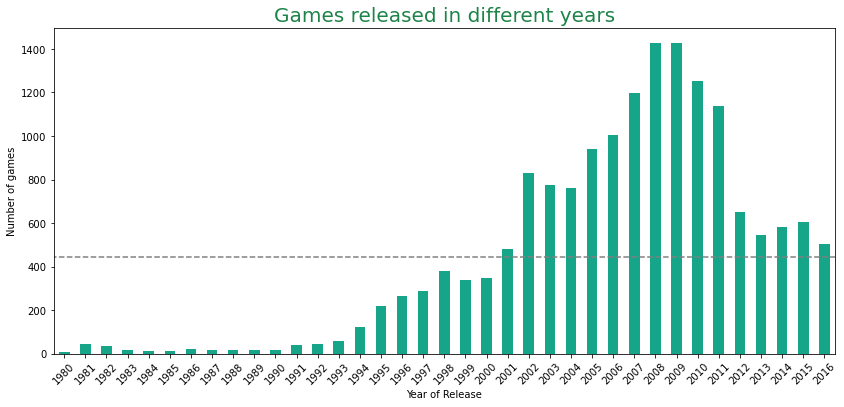

In [16]:
#bar chart for game count released per year

game_bar = games_group.plot(kind = 'bar',color = '#17A589',figsize = (14,6), rot = 45, legend = False);
game_bar.set_xlabel('Year of Release');
game_bar.set_ylabel('Number of games');
plt.title('Games released in different years',loc = 'center',fontsize=20,color="#1D8348" );
plt.hlines(games_group.name.mean(), xmin = -1, xmax = 100, linestyle = 'dashed',color = 'grey')
plt.show()

###### insights:

- Games were not very popular in the early 90's. However, the popularity of games increased after 2000 and so the number of games released at that period also increased. 
- There is a futher decline in the games released. It could be because games were popular only were a moment when there was something new introduced and the decline could mean people losing interest and so new games decrease 

**2.  Sales variation from platform to platfrom , Most popular Platform and unpopular platforms**

In [17]:
#Pivoting for total sales per platform

platform_group = games.pivot_table(index = 'platform', values = 'total_sales',aggfunc = 'sum')
platform_group.head(3)

,total_sales
platform,
2600,96.98
3DO,0.00
3DS,158.33


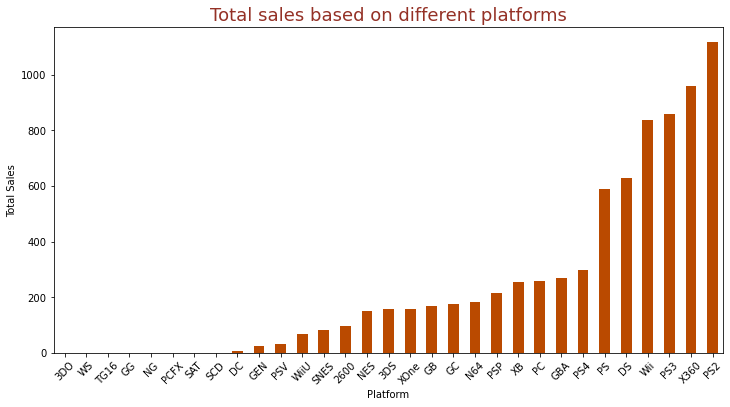

In [79]:
#Bar plot for total sales vs Platform

platform_bar = platform_group.sort_values('total_sales',ascending = True).plot(kind = 'bar',color = '#BA4A00',figsize = (12,6), legend=False, rot=45)
platform_bar.set_xlabel('Platform')
platform_bar.set_ylabel('Total Sales')
plt.title('Total sales based on different platforms',loc = 'center',fontsize=18,color="#943126")
plt.show()

In [80]:
# platform with total greatest sale 

top_plat = platform_group.total_sales.nlargest(1).index.to_list()[0]

ps2 = games[(games.platform == top_plat) & (games.year_of_release != 0)].groupby('year_of_release').name.count().to_frame()#.sort_values(ascending = False)
ps2.head(3)

,name
year_of_release,
2000,82
2001,185
2002,280


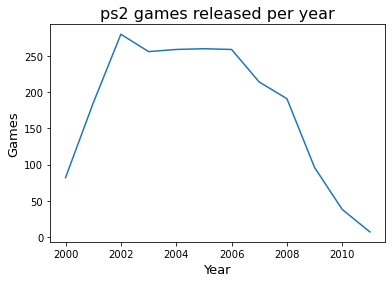

In [81]:
plt.plot(ps2.index, ps2.name)
plt.title('ps2 games released per year', fontsize = 16)
plt.xlabel('Year', fontsize =13)
plt.ylabel('Games', fontsize=13)
plt.show()

> - ps2 games were most sold in the year 2002, after which there was a steady count in the following years and then it frther decreased

In [82]:
games_per_platform = games[games.year_of_release != 0].groupby(['platform','year_of_release']).name.nunique().to_frame().reset_index()
games_per_platform 

,platform,year_of_release,name
0,2600,1980,9
1,2600,1981,46
2,2600,1982,36
3,2600,1983,11
4,2600,1984,1
...,...,...,...
233,XB,2008,1
234,XOne,2013,19
235,XOne,2014,61
236,XOne,2015,80


In [83]:
fig = px.line(games_per_platform, x="year_of_release", y="name", color="platform",
              line_group="platform", hover_name="platform")
fig.show()

> - Platfroms like PS, PS2, DS and Wii became more popular than other platfroms and then eventually its popularity dropped

In [84]:
games.groupby('platform').year_of_release.nunique().mean()

8.193548387096774

> - On an average, new platfroms appear and the old ones fades in a span of approximately 8 years

###### Insights :

- The chart shows that the most sold platforms come from Sony, Microsoft and nintendo
- PS2 has the highest total sales and it had the maximum sales in the year 2014
- some platforms like xone, gb etc had some decent sales in early 2000s and apparently lost its popularity with time

#### Data period to consider ( The data should allow you to build a prognosis for 2017 )

In [24]:
#Creating new table for data beyond 2010

data = games[games.year_of_release > 2010]
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,20.07
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.21
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.60
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,not rated,14.27
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,not rated,10.25


###### Opinion: 

- Since gaming platforms released before 2010 are old and outdated, we consider only those that were used after 2010 and remove the rest as they dont add value for our analysis  


#### Growing vs shrinking platforms

In [25]:
# Printing platforms sorted by their total sales in descending order

df = data[['platform','total_sales']].groupby(['platform']).sum().sort_values(by = 'total_sales').reset_index()
df.sort_values('total_sales',ascending = False)

,platform,total_sales
11,PS3,396.18
10,X360,377.03
9,PS4,298.18
8,XOne,158.98
7,3DS,157.19
6,PC,97.68
5,Wii,86.05
4,WiiU,69.18
3,PSV,31.97
2,DS,30.69


In [26]:
df['sales'] = (df['total_sales'] - df['total_sales'].mean())/df['total_sales'].std()
#df.tail()

In [27]:
df['colors'] = ['red' if x<0 else '#2874A6' for x in df['sales']]
#df

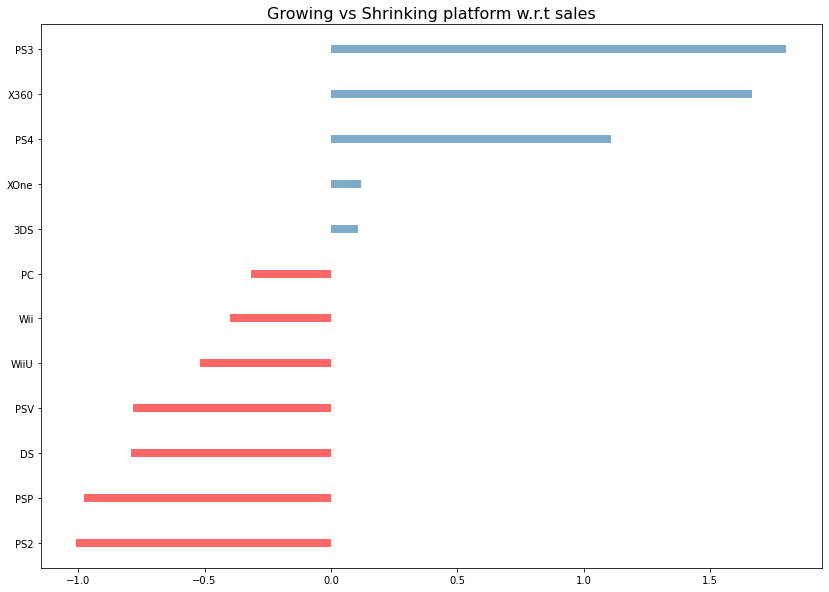

In [28]:
plt.figure(figsize = (14,10))
plt.hlines(y = df.platform,xmax = df.sales,xmin = 0,color = df.colors,alpha = 0.6,linewidth = 8)
plt.title('Growing vs Shrinking platform w.r.t sales', fontsize = 16)
plt.show()

###### Insights :

- ps2, x360, ps3, wii and ds are the top five platforms w.r.t sales whereas platforms such as ws,dc,n64,gb and 2600 are suffering from sales. 
- The difference between ps2 and ps3 is significantly high. The reason could be because of the features provided by both the platforms. 

In [29]:
# Box plot to see the sales range for each platform

grouped = data.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
ordered = grouped.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']

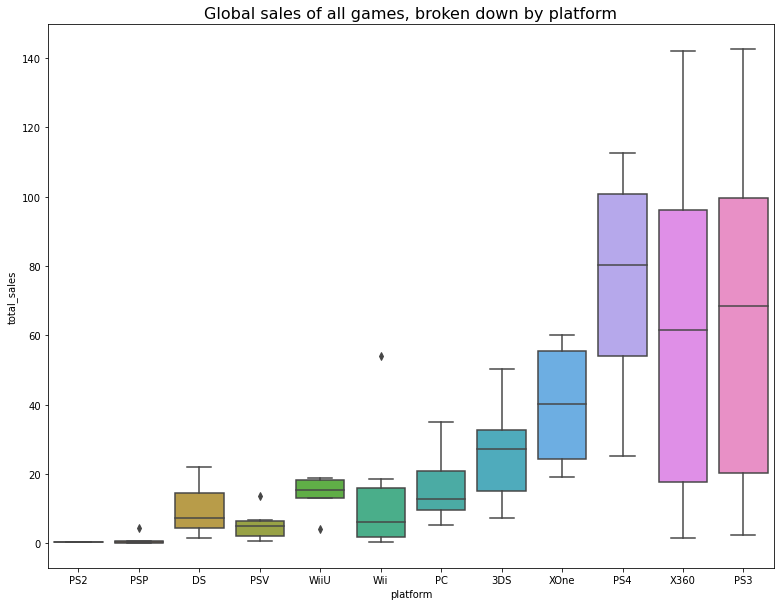

In [30]:
plt.figure(figsize = (13,10))
sns.boxplot(x = 'platform', y = 'total_sales',data = grouped,order = ordered)
plt.title('Global sales of all games, broken down by platform', fontsize =16)
plt.show()

###### Insights:

- PS2 and PS3 turns out to be the most profitable platform with a median of about 12 compared to other platforms. 
- Wii has a low median and huge difference between the two Quartiles indicating that its popularity has been oscillating. 
- ds, ps3,x360 and ps2 are the top competing platforms 
- Platforms such as WS, DC, n64, gb, 2600, ps, psv, wiiu, pc has not gained much popularity. 


#### Correlation between reviews and sales

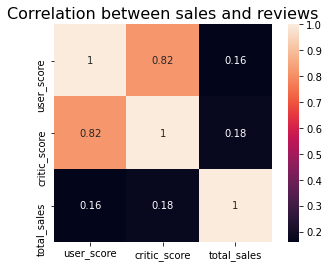

In [31]:
cm = games[['user_score','critic_score','total_sales']].corr()
sns.heatmap(data = cm, annot=True, square = True)
plt.title('Correlation between sales and reviews', fontsize = 16)
plt.show()

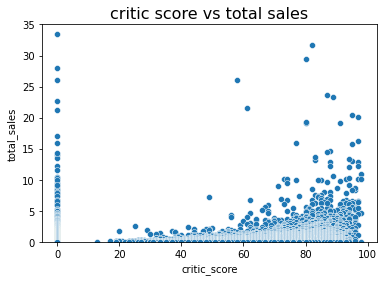

In [32]:
sns.scatterplot(data=games, x="critic_score", y="total_sales")
plt.ylim(0,35)
plt.title('critic score vs total sales', fontsize=16)
plt.show()

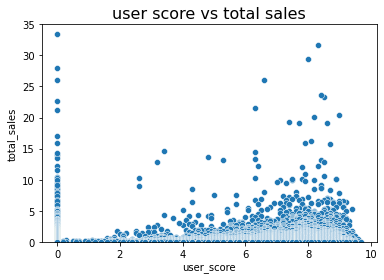

In [33]:
sns.scatterplot(data=games, x="user_score", y="total_sales")
plt.ylim(0,35)
plt.title('user score vs total sales', fontsize=16)
plt.show()

###### insights:

- There is a very weak correlation between critic score and total sales as well as very weak correlation between user score and total sales. Additionally, there is a very strong correlation between user score and critic score. 
- User score is highly dependent on critic score and vice versa but user score or critic score do not affect total sales much

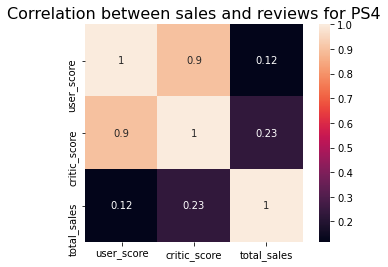

In [34]:
# choosing one popular platform 

ps4 = games[games.platform == 'PS4']

cm1 = ps4[['user_score','critic_score','total_sales']].corr()
sns.heatmap(data = cm1, annot=True, square = True)
plt.title('Correlation between sales and reviews for PS4', fontsize = 16)
plt.show()

> - For PS4, critic score and total sales show weak correlation whereas user score and total sales show very weak correlation
> - There is also a very strong correlation between user score and critic score 

#### Games on different platforms

In [35]:
# drawing games from popular platfroms 

games_filtered = games[games.platform == 'PS4']
game_name = games_filtered.name.to_list()

ps4_games = games_filtered.groupby('name').total_sales.sum().sort_values(ascending=False).to_frame().reset_index()
ps4_games.head()

,name,total_sales
0,Call of Duty: Black Ops 3,14.27
1,Grand Theft Auto V,12.24
2,FIFA 16,8.52
3,Star Wars Battlefront (2015),7.76
4,FIFA 17,7.52


In [36]:
# games from popular platfroms on other platforms 

other_plat = games[(games.platform != 'PS4') & (games.name.isin(game_name))]

In [37]:
other_plat_games  = other_plat.groupby('name').total_sales.sum().sort_values(ascending=False).to_frame().reset_index()

In [38]:
comparison = ps4_games.merge(other_plat_games,on='name', how='inner', suffixes = ['_ps4','_other'])
comparison['diff'] = comparison['total_sales_ps4']  - comparison['total_sales_other']
comparison.sort_values('diff',ascending=False).head()

,name,total_sales_ps4,total_sales_other,diff
4,FIFA 17,7.52,3.85,3.67
3,Star Wars Battlefront (2015),7.76,4.19,3.57
0,Call of Duty: Black Ops 3,14.27,10.96,3.31
16,Batman: Arkham Knight,3.86,1.62,2.24
22,Assassin's Creed Syndicate,3.32,1.51,1.81


> - These are the top 5 games for which the total sales was more for PS4 compared to other platforms 

In [39]:
comparison.sort_values('diff',ascending=True).head()

,name,total_sales_ps4,total_sales_other,diff
1,Grand Theft Auto V,12.24,42.92,-30.68
18,Call of Duty: Ghosts,3.78,23.13,-19.35
55,The Elder Scrolls V: Skyrim,1.28,19.47,-18.19
11,Minecraft,4.18,18.74,-14.56
26,FIFA 14,2.90,13.36,-10.46


> - These are the top 5 games for which the total sales was less for PS4 compared to other platfroms 

#### sales by genre

In [40]:
Global_top_gen = games.pivot_table(index = 'genre',values = 'total_sales',aggfunc = 'sum')
Global_top_gen.sort_values(by= 'total_sales',ascending = False).head(5)

,total_sales
genre,
Action,1582.74
Sports,1195.73
Shooter,1013.69
Platform,696.94
Misc,694.40


In [41]:
Global_top_gen.sort_values(by= 'total_sales',ascending = False).tail()

,total_sales
genre,
Fighting,360.05
Simulation,326.17
Adventure,185.29
Puzzle,185.26
Strategy,124.57


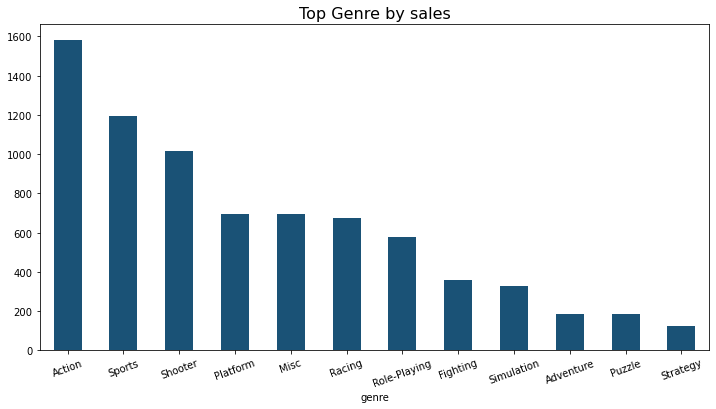

In [89]:
Global_top_gen.sort_values(by= 'total_sales',ascending = False).plot(kind = 'bar',figsize = (12,6),color = '#1A5276', rot=20, legend = False);
plt.title('Top Genre by sales', fontsize=16);

###### insights:

- action seems to be the most popular genre and strategy being the least
- Increase in RPG, First-person shooting kind of games , increased the sales of action genere while games like chess , puzzle etc seem outdated and reduced sales

### Create a user profile for each region

##### Platforms

In [43]:
#NA top selling platforms
NA_top = games.pivot_table(index = 'platform',values = 'na_sales',aggfunc = 'sum').sort_values('na_sales',ascending=False)
NA_top.head()#.sort_values(by = 'na_sales',ascending = False).head(5)

,na_sales
platform,
X360,602.47
PS2,583.84
Wii,496.90
PS3,393.49
DS,382.40


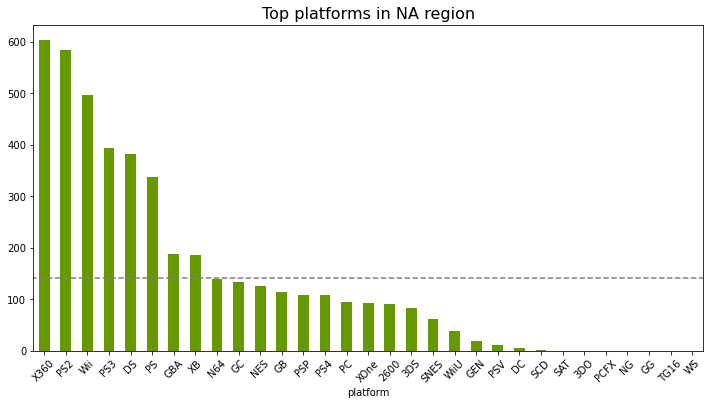

In [91]:
NA_top.plot(kind = 'bar',figsize = (12,6),color = '#669900', legend=False, rot=45)
plt.hlines(NA_top.na_sales.mean(), xmin = -1, xmax = 100, linestyle = 'dashed',color = 'grey')
plt.title('Top platforms in NA region', fontsize=16);

- According to 'NA_sales' x360 and ps2 are leading the sales. 

In [45]:
#EU top selling platforms 
EU_top = games.pivot_table(index = 'platform',values = 'eu_sales',aggfunc = 'sum').sort_values('eu_sales',ascending=False)
EU_top.head()#.sort_values(by = 'eu_sales',ascending = False).head(5)

,eu_sales
platform,
PS2,339.29
PS3,330.29
X360,270.76
Wii,262.21
PS,213.61


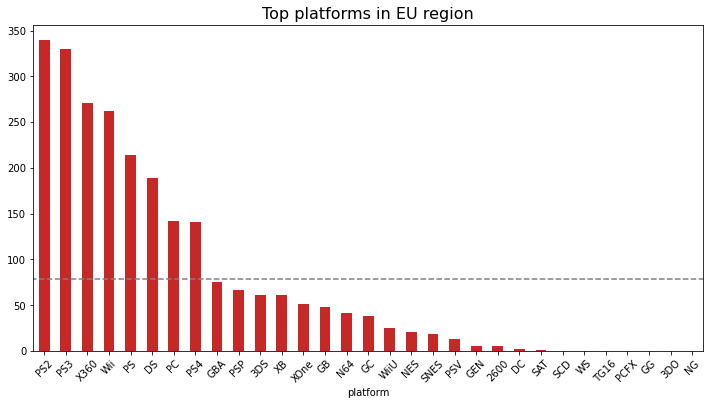

In [92]:
EU_top.plot(kind = 'bar',figsize = (12,6),color = '#C62828', legend=False, rot=45);
plt.hlines(EU_top.eu_sales.mean(), xmin = -1, xmax = 100, linestyle = 'dashed',color = 'grey')
plt.title('Top platforms in EU region', fontsize=16);

- According to EU_sales ps2 and ps3 both from the same company are leading the sales.

In [47]:
#JP top selling platforms
JP_top = games.pivot_table(index = 'platform',values = 'jp_sales',aggfunc = 'sum').sort_values('jp_sales',ascending=False)
JP_top.head()#.sort_values(by = 'jp_sales',ascending = False).head(5)

,jp_sales
platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
3DS,100.67


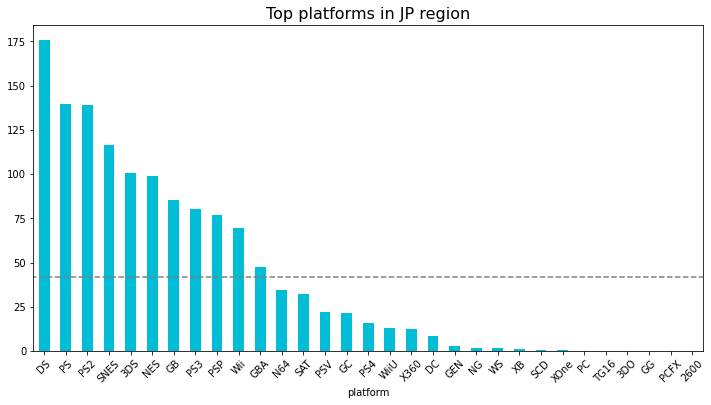

In [93]:
JP_top.plot(kind = 'bar',figsize = (12,6),color = '#00BCD4', legend=False, rot=45);
plt.hlines(JP_top.jp_sales.mean(), xmin = -1, xmax = 100, linestyle = 'dashed',color = 'grey')
plt.title('Top platforms in JP region', fontsize=16);

- According to JP_sales ds,ps and ps2 are leading in sales.

> - The average sales in NA region is around 150, 80 in EU region and around 45 n JP region
> - Number of platfroms that exceed the average sales is more in JP region compared to other regions, whereas same number of platforms cross the mean sales in other regions

##### Genres

In [49]:
#Top selling NA region genres
NA_top_gen = games.pivot_table(index = 'genre',values = 'na_sales',aggfunc = 'sum').sort_values('na_sales',ascending=False)
NA_top_gen.sort_values(by= 'na_sales',ascending = False).head(5)

,na_sales
genre,
Action,879.01
Sports,684.43
Shooter,592.24
Platform,445.50
Misc,407.27


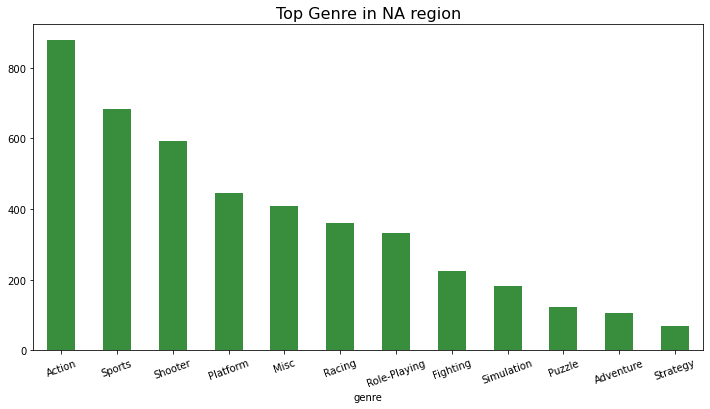

In [94]:
NA_top_gen.plot(kind = 'bar',figsize = (12,6),color = '#388E3C', legend=False, rot=20)
plt.title('Top Genre in NA region', fontsize=16);

- Action is the top selling genre in NA_region

In [51]:
#Top selling EU region genres
EU_top_gen = games.pivot_table(index = 'genre',values = 'eu_sales',aggfunc = 'sum').sort_values('eu_sales',ascending=False)
EU_top_gen.sort_values(by = 'eu_sales',ascending = False).head(5)

,eu_sales
genre,
Action,519.13
Sports,376.79
Shooter,317.34
Racing,236.51
Misc,212.74


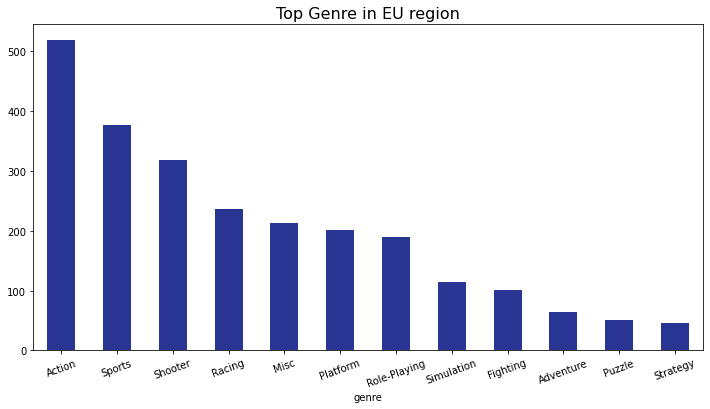

In [95]:
EU_top_gen.plot(kind = 'bar',figsize = (12,6),color = '#283593', legend = False, rot=20)
plt.title('Top Genre in EU region', fontsize=16);

- Action is the top selling genre in EU_region

In [53]:
##Top selling JP region genres
JP_top_gen = games.pivot_table(index = 'genre',values = 'jp_sales',aggfunc = 'sum').sort_values('jp_sales',ascending=False)
JP_top_gen.sort_values(by = 'jp_sales',ascending = False).head(5)

,jp_sales
genre,
Role-Playing,355.41
Action,161.43
Sports,135.54
Platform,130.83
Misc,108.11


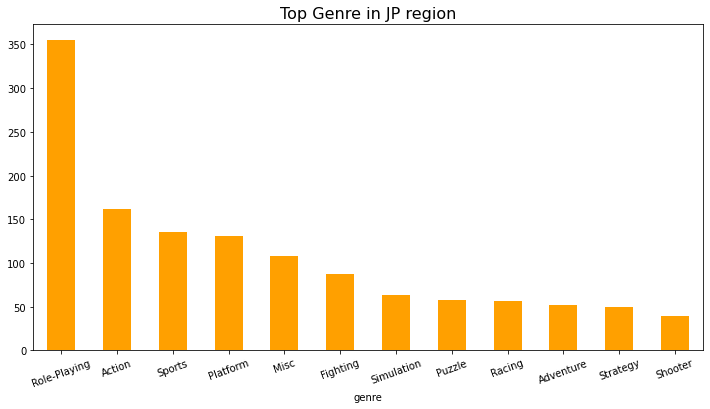

In [96]:
JP_top_gen.plot(kind = 'bar',figsize = (12,6),color = '#FFA000', legend=False, rot=20)
plt.title('Top Genre in JP region', fontsize=16);

- Role-playing is the top selling genre in JP_region

> - Action, sports and Misc genres are favorites of all region
> - Shooter is famous in NA and EU regions and platfrom is common to NA and JP region
> - Role playing is favorite of people from JP region while Racing is preferred aminly in EU ragion

###### Sales based on ESRB ratings

In [55]:
#NA_sales based on ESRB ratings
NA_esrb = games[games.rating != 'not rated'].pivot_table(index = 'rating',values = 'na_sales',aggfunc = 'sum').sort_values('na_sales', ascending=False)
NA_esrb.sort_values(by = 'na_sales',ascending = False).head(5)

,na_sales
rating,
E,1292.99
T,759.75
M,748.48
E10+,353.32
K-A,2.56


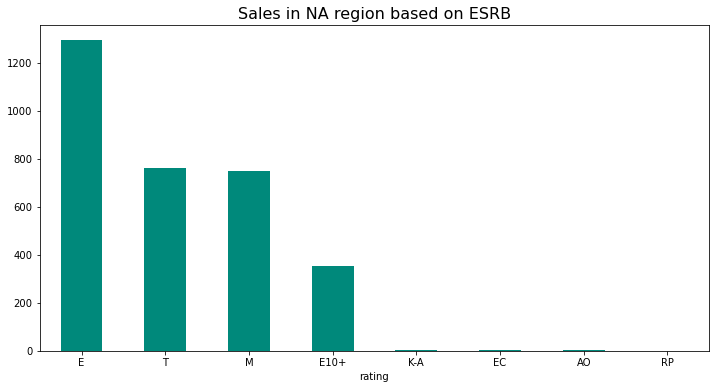

In [97]:
NA_esrb.plot(kind = 'bar',figsize = (12,6),color = '#00897B', rot=0, legend=False)
plt.title('Sales in NA region based on ESRB', fontsize=16);

In [57]:
#EU_sales based on ESRB ratings
EU_esrb = games[games.rating != 'not rated'].pivot_table(index = 'rating',values = 'eu_sales',aggfunc = 'sum').sort_values('eu_sales', ascending=False)
EU_esrb.sort_values(by = 'eu_sales',ascending = False).head(5)

,eu_sales
rating,
E,710.25
M,483.97
T,427.03
E10+,188.52
AO,0.61


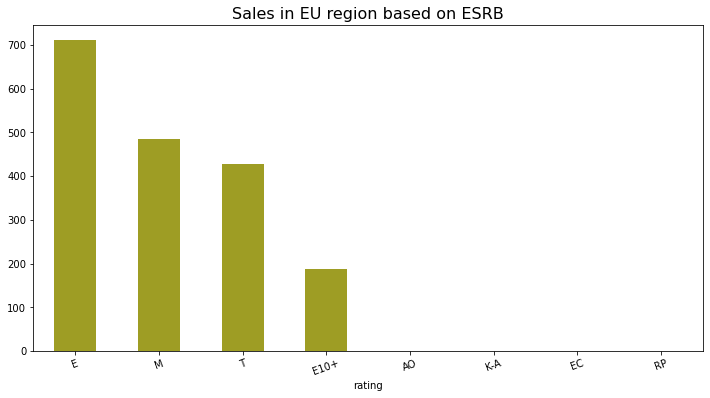

In [99]:
EU_esrb.plot(kind = 'bar',figsize = (12,6),color = '#9E9D24',rot=20, legend=False)
plt.title('Sales in EU region based on ESRB', fontsize=16);

In [59]:
#JP_sales based on ESRB ratings
JP_esrb = games[games.rating != 'not rated'].pivot_table(index = 'rating',values = 'jp_sales',aggfunc = 'sum').sort_values('jp_sales', ascending=False)
JP_esrb.sort_values(by = 'jp_sales',ascending = False).head(5)

,jp_sales
rating,
E,198.11
T,151.40
M,64.24
E10+,40.20
K-A,1.46


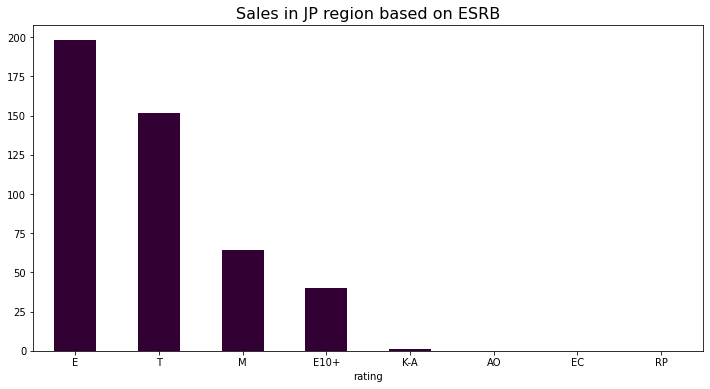

In [100]:
JP_esrb.plot(kind = 'bar',figsize = (12,6),color = '#330033', rot=0, legend=False)
plt.title('Sales in JP region based on ESRB', fontsize=16);

> - Mostly the E rated games are sold the most in all the regions
> - The other games rated as T, M and E10+ are also sold more but the games rated as K-A, AO, EC and RP are sold the least
> - ESRB ratings affect sales almost equally in all regions 

### Test the following hypotheses

- Two sample t-test is chosen to test the hypothesis as it is the most commonly used test to compare the mean of the two samples. It is used in cases when population parameters (mean, std. ) are not known

- For testing the hypothesis , alpha value of 0.05 is chosen as it is most common

#### 1. Average User ratings of Xbox and PC

Null and alternate hypothesis formulation
- Ho = Average user ratings of the Xbox One and PC platforms are same
- H1 = Average user ratings of the Xbox One and PC platforms are not same

In [61]:
xone  = games.query('platform == "XOne"')
pc = games.query('platform == "PC"')

In [62]:
# xone_m = Xone['user_score'].astype(float)
# pc_m = pc['user_score'].astype(float)

In [63]:
var1 = np.var(xone.user_score)
var2 = np.var(pc.user_score)
final_var = var2 - var1
print('Variance difference is:',final_var)

percent_diff = ((var2 - var1)/((var2 + var1)/2))*100
print('Percentage difference is:',percent_diff)

Variance difference is: 0.46283515937587794
Percentage difference is: 4.686711012476794


In [64]:
from scipy.stats import ttest_ind
stat,p = ttest_ind(xone.user_score,pc.user_score,equal_var = False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
     print('reject H0')
else:
     print('Failed to reject H0')

stat=-3.494, p=0.001
reject H0


- p-value < alpha indicates that the null hypothesis is rejected

#### 2. Average User ratings for Action and Sports genres

Null and Alternate hypothesis formulation

- Ho = Average user ratings for the Action and Sports genres are not different
- H1 = Average user ratings for the Action and Sports genres are different

In [71]:
action = games.query('genre == "Action"')
sports = games.query('genre == "Sports"')
# action_f = action['user_score'].astype(float)
# sports_f = sports['user_score'].astype(float)

In [72]:
var_1 = np.var(action.user_score)
var_2 = np.var(sports.user_score)
finale_var = var_2 - var_1
print('Variance difference is:',finale_var)

percent_difff = ((var_2 - var_1)/((var_2 + var_1)/2))*100
print('Percentage difference is:',percent_difff)

Variance difference is: -0.1611960772360952
Percentage difference is: -1.205700910061382


In [74]:
from scipy.stats import ttest_ind
stat,p = ttest_ind(action.user_score,sports.user_score,equal_var = False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
     print('H0 rejected')
else:
     print('Failed to reject H0')


stat=5.715, p=0.000
H0 rejected


- p-value < alpha so the null hypothesis is rejected

## Conclusion

- Data was checked for missing values and duplicates. In case of numerical data, missing values were filled with median so as to avoid skewing which happens in case of mean. All categorical variables were lower cased and checked for duplicates. The data contained 0 duplicates. 

Data Insights:

1. At first, the count of games released over the years were plotted using bar plot. The interest among people for gaming seemed to have risen after 2000 which resulted in more games being released after 2000.
       
2. Next, we look for the sales of games on different platforms. PS2 was leading among all. Playstations normally come with great features that entertain users. With release of PS3 , price of PS2 would have reduced which is why there were more sales for ps2 than ps3 or others. However its sales declined further in future after 2014.

3. Plotting line graph for sales on different platform over the years, it was clear that the popularity of games usually only lasts for about 10 years.
       
4. The games released before 2000 were too few in count and were omitted as they don’t add much value to the analysis.

5. Some of the growing and shrinking games were plotted. It was seen that Platforms from sony, microsoft and nintendo were most profitable.  
       
6. Plotting correlation scatter plot between critic / user and total sales, it was found that they are positively correlated (although weakly) meaning the higher the users/critic scores, the greater is their sales.
       
7. The most preferred genre in games was action and strategy being the least 

8. In user profile for each region:- Platform = Based on three region sales the ps2 was amongst the top-5 selling console in each                                                region.
                                       
- Genre = Based on three region sales action was amongst the top-5 selling game genres in each                                             region.
                                    
- Ratings = Based on three region sales 'E' rating games was amongst the top-5 selling game                                                 rating in each region.
     

- Average Xbox and PC ratings were tested if they are the same using t-test and it was proved it wasn’t. Similarly , it was tested if average user ratings for action genre and sports genres were same and it was proven not.


Recommendations:

- Increase marketing campaigns for platforms which are not performing very well in sales 
- launch exciting exclusive games for such platforms 
- adapt some useful, well liked features from on demand platforms
- Produce more number of platforms that reach the customers demand and games accordingly 
- Release more of action, sports and misc games 